<img src="Images/PU.png" width="100%">

### Course Name : Python for Data Analysis  
#### Notebook compiled by : Rajiv Kale, Consultant at Learning and Development  
** Important ! ** For internal circulation only

# Extracting features from the Text
Many machine learning applications like sentiment analysis, text data is used as explanatory variable. Text must be converted to a different representation that captures as much of its information  as possible in a feature vector.
<img src="Images/Text_Data.png" width="80%">


# The bag-of-words representation

Let’s assume that, we are working on document classification problem. The collection of all the documents is called as Corpus.

In [1]:
X = ["Hackethon program was challenging and we enjoyed every bit of it",
     "Amazing initiative as Hackethon brings out best from innovaters"]

In [2]:
len(X)

2

In Scikit, there is an encoder to score words based on their count called CountVectorizer, one for using a hash function of each word to reduce the vector length called HashingVectorizer, and a one that uses a score based on word occurrence in the document and the inverse occurrence across all documents called TfidfVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
vectorizer.vocabulary_

{'amazing': 0,
 'and': 1,
 'as': 2,
 'best': 3,
 'bit': 4,
 'brings': 5,
 'challenging': 6,
 'enjoyed': 7,
 'every': 8,
 'from': 9,
 'hackethon': 10,
 'initiative': 11,
 'innovaters': 12,
 'it': 13,
 'of': 14,
 'out': 15,
 'program': 16,
 'was': 17,
 'we': 18}

In [5]:
X_bag_of_words = vectorizer.transform(X)
X_bag_of_words

<2x19 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [6]:
X_bag_of_words.shape

(2, 19)

In [7]:
X_bag_of_words.toarray()

array([[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]],
      dtype=int64)

### Adding stop words

In [8]:
#my_list=['is','of']
my_list=['was','from', 'of', 'and']

In [9]:

vectorizer = CountVectorizer(stop_words=my_list)
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['was', 'from', 'of', 'and'], strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [10]:
vectorizer.vocabulary_

{'amazing': 0,
 'as': 1,
 'best': 2,
 'bit': 3,
 'brings': 4,
 'challenging': 5,
 'enjoyed': 6,
 'every': 7,
 'hackethon': 8,
 'initiative': 9,
 'innovaters': 10,
 'it': 11,
 'out': 12,
 'program': 13,
 'we': 14}

In [11]:
X_bag_of_words = vectorizer.transform(X)
print(X_bag_of_words.shape)
X_bag_of_words.toarray()

(2, 15)


array([[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]], dtype=int64)

# Finding Important Words in Text Using TF-IDF
TF-IDF stands for "Term Frequency, Inverse Document Frequency". It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

+ If a word appears frequently in a document, it's important. Give the word a high score.
+ But if a word appears in many documents, it's not a unique identifier. Give the word a low score.

Please find more math details [here](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
import numpy as np
np.set_printoptions(precision=2)

print(tfidf_vectorizer.transform(X).toarray())

[[0.   0.31 0.   0.   0.31 0.   0.31 0.31 0.31 0.   0.22 0.   0.   0.31
  0.31 0.   0.31 0.31 0.31]
 [0.34 0.   0.34 0.34 0.   0.34 0.   0.   0.   0.34 0.24 0.34 0.34 0.
  0.   0.34 0.   0.   0.  ]]


# N-Grams
Look for sequence of tokens

In [14]:
Ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))
Ngram_vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
Ngram_vectorizer.get_feature_names()

['amazing initiative',
 'amazing initiative as',
 'and we',
 'and we enjoyed',
 'as hackethon',
 'as hackethon brings',
 'best from',
 'best from innovaters',
 'bit of',
 'bit of it',
 'brings out',
 'brings out best',
 'challenging and',
 'challenging and we',
 'enjoyed every',
 'enjoyed every bit',
 'every bit',
 'every bit of',
 'from innovaters',
 'hackethon brings',
 'hackethon brings out',
 'hackethon program',
 'hackethon program was',
 'initiative as',
 'initiative as hackethon',
 'of it',
 'out best',
 'out best from',
 'program was',
 'program was challenging',
 'was challenging',
 'was challenging and',
 'we enjoyed',
 'we enjoyed every']

In [16]:
Ngram_vectorizer.transform(X).toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

# SMS Spam Collection Data Set


The dataset is available at [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) It is a collection of more than ** 5 thousand SMS phone messages.** 
<img src="Images/spam.jpg" width="80%">

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('./Datasets/SMSSpamCollection', sep='\t', names=["label", "message"])
df.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Lets see the composition of the dataset

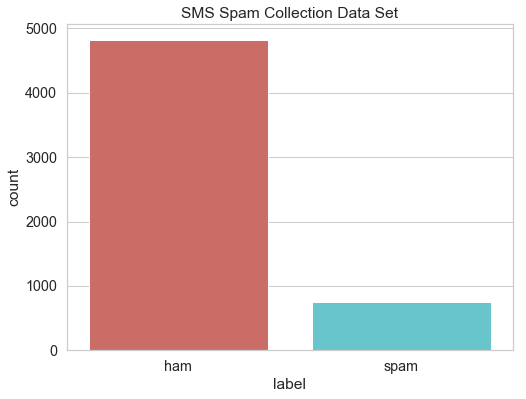

In [20]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid", font_scale=1.3)
ax=sns.countplot(x="label", data=df, palette="hls")
ax.set_title('SMS Spam Collection Data Set');


Lets add one more coulumn as the length of the SMS's

In [21]:
df['length'] = df['message'].map(lambda text: len(text))
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


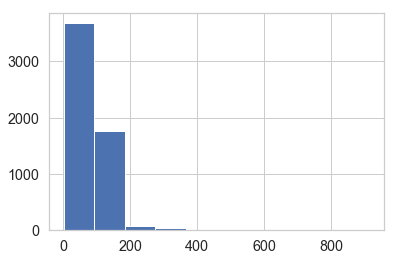

In [22]:
df["length"].hist()

In [23]:
print(df["message"][df["length"]>900])

1085    For me the love should start with attraction.i...
Name: message, dtype: object


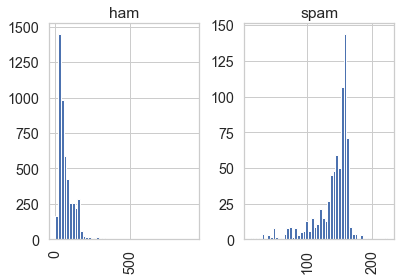

In [24]:
df.hist(column='length', by='label', bins=50);

# Converting Text into Vectors 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df["message"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
vectorizer.vocabulary_

{'wit': 8491,
 'walks': 8290,
 'jsco': 4357,
 'epi': 2970,
 'look': 4735,
 '09064017305': 246,
 'musta': 5246,
 'uncles': 8033,
 'modl': 5132,
 'seat': 6728,
 'speed': 7172,
 'street': 7337,
 'brief': 1714,
 'videosounds': 8203,
 'paris': 5730,
 'freemsg': 3380,
 'skip': 6990,
 'docks': 2693,
 'probs': 6126,
 'andre': 1099,
 'total': 7873,
 'necklace': 5321,
 'lasting': 4546,
 '9yt': 849,
 'iwas': 4261,
 'rayan': 6291,
 '6th': 698,
 'video': 8198,
 'extract': 3093,
 'posible': 5997,
 'meet': 4987,
 'foregate': 3326,
 'lit': 4684,
 '01223585236': 6,
 'module': 5133,
 'smokes': 7048,
 'swhrt': 7500,
 'handle': 3745,
 'meive': 4996,
 'alaipayuthe': 1023,
 'dates': 2465,
 'unclaimed': 8031,
 'update_now': 8092,
 'lookin': 4738,
 'whos': 8440,
 'keeping': 4415,
 'way': 8341,
 'sell': 6763,
 'gnt': 3569,
 '7th': 728,
 'barring': 1409,
 '5k': 644,
 'noun': 5450,
 'groovy': 3671,
 'section': 6738,
 '4got': 596,
 'rearrange': 6326,
 'babysit': 1360,
 'claim': 2067,
 'relocate': 6403,
 'shampain

In [27]:
X_bag_of_words = vectorizer.transform(df["message"])
X_bag_of_words

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [28]:
X_bag_of_words.shape

(5572, 8713)

In [29]:
X_bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
message4 = df['message'][3]
print(message4)


U dun say so early hor... U c already then say...


In [31]:
bow4 = vectorizer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1054)	1
  (0, 2815)	1
  (0, 2836)	1
  (0, 3952)	1
  (0, 6679)	2
  (0, 7074)	1
  (0, 7688)	1
(1, 8713)


In [32]:
print(vectorizer.get_feature_names()[1054])
print(vectorizer.get_feature_names()[6679])

already
say


In [33]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df["message"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [34]:
tfidf4 = tfidf_vectorizer.transform([message4])
print(tfidf4)


  (0, 7688)	0.23932339200131514
  (0, 7074)	0.20366517080216648
  (0, 6679)	0.5877104328159917
  (0, 3952)	0.48883827585496475
  (0, 2836)	0.3531363589768002
  (0, 2815)	0.32530327883363347
  (0, 1054)	0.29385521640799583


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print("\nidf=")
print(vectorizer.idf_)
# encode document
vector1 = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector1.shape)
print("\ndocument1=")
print(vector1.toarray())

# encode document
vector2 = vectorizer.transform([text[1]])
# summarize encoded vector
print(vector2.shape)
print("\ndocument2=")
print(vector2.toarray())
# 'brown': 0, 'dog': 1, 'fox': 2, 'jumped': 3, 'lazy': 4, 'over': 5,'quick': 6,'the': 7 
# Words appearing only in first document would have max frequence (quick, brown, jumped, over..)
# words appearing in two of the three documents would have little less number
# words appearing in all three documents ("the") is having assigned number 1.

{'the': 7, 'fox': 2, 'lazy': 4, 'jumped': 3, 'dog': 1, 'over': 5, 'quick': 6, 'brown': 0}

idf=
[1.69 1.29 1.29 1.69 1.69 1.69 1.69 1.  ]
(1, 8)

document1=
[[0.36 0.28 0.28 0.36 0.36 0.36 0.36 0.43]]
(1, 8)

document2=
[[0.   0.79 0.   0.   0.   0.   0.   0.61]]


#### How to use Keras for similar work

Bag-of-Words with Keras The Keras Python library for deep learning also provides tools for encoding text using the bag-of words-model in the Tokenizer class.

As above, the encoder must be trained on source documents and then can be used to encode training data, test data and any other data in the future. The API also has the benefit of performing basic tokenization prior to encoding the words.

The snippet below demonstrates how to train and encode some small text documents using the Keras API and the ‘count’ type scoring of words.

In [36]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print("\nWord Counts=")
print(t.word_counts)
print("\nDocumentCount=")
print(t.document_count)
print("\nWord Index=")
print(t.word_index)
print("\nWord Docs=")
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print("\nEncoded Docs=")
print(encoded_docs)

Using TensorFlow backend.



Word Counts=
OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])

DocumentCount=
5

Word Index=
{'effort': 6, 'nice': 7, 'great': 5, 'good': 4, 'work': 1, 'excellent': 8, 'done': 3, 'well': 2}

Word Docs=
{'effort': 1, 'nice': 1, 'great': 1, 'good': 1, 'work': 2, 'excellent': 1, 'done': 1, 'well': 1}

Encoded Docs=
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [37]:
# How to use on test text?
test_docs = ['Very Well done!',
        'Amazing work',
        'effort Great',
        'nice work',
        'Excellent! work']

encoded_test_docs = t.texts_to_matrix(test_docs, mode='count')
print("\nEncoded Test Docs=")
print(encoded_test_docs)


Encoded Test Docs=
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]]


##### Note: Word order in original sentence is not maintained in the representation